In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [2]:
data_1 = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Machine_Learning/main/Luis/Data1.txt', 
                        encoding = "utf-16", sep = ',')

data_2 = pd.read_table('https://raw.githubusercontent.com/LuchoValr/Machine_Learning/main/Luis/Data2.txt',
                       encoding = "utf-16", sep = ',')

In [5]:
#El primer dataset se estima con una regresion lineal, ya que la dependiente es una variable continua
data_1.head()

,BACKYARD SIZE(m2),PRICE(USD)
0,9,105389
1,7,104966
2,5,126301
3,5,117774
4,7,132206


In [6]:
#El segundo dataset se estima con una regresion logistica, ya que la dependiente es una variable discreta o binaria
data_2.head()

,Security Level,SAFE
0,4,NO
1,1,NO
2,10,YES
3,7,YES
4,4,NO


In [7]:
#El segundo dataset la dependiente no está dada de manera númerica
data_2['SAFE'] = data_2['SAFE'].replace({'NO' : 0, 'YES' : 1})
data_2.head()

,Security Level,SAFE
0,4,0
1,1,0
2,10,1
3,7,1
4,4,0


In [8]:
#Regresion primer dataset
X_data_1 = np.array(data_1['BACKYARD SIZE(m2)']).reshape((-1, 1))
Y_data_1 = np.array(data_1['PRICE(USD)'])

model_1 = LinearRegression(fit_intercept = False)
model_1.fit(X_data_1, Y_data_1)

print(f'intercepto (b): {model_1.intercept_}''\n', 
      f'pendiente (w): {model_1.coef_}')

intercepto (b): 0.0
 pendiente (w): [16018.50311547]


In [9]:
#Regresion segundo dataset
X_data_2 = np.array(data_2['Security Level']).reshape((-1, 1))
Y_data_2 = np.array(data_2['SAFE'])

model_2 = LogisticRegression()
model_2.fit(X_data_2, Y_data_2)

print(f' la pendiente (w) es {model_2.coef_}''\n', 
      f'el intercepto (b) es {model_2.intercept_}')


 la pendiente (w) es [[7.2246189]]
 el intercepto (b) es [-39.81014592]


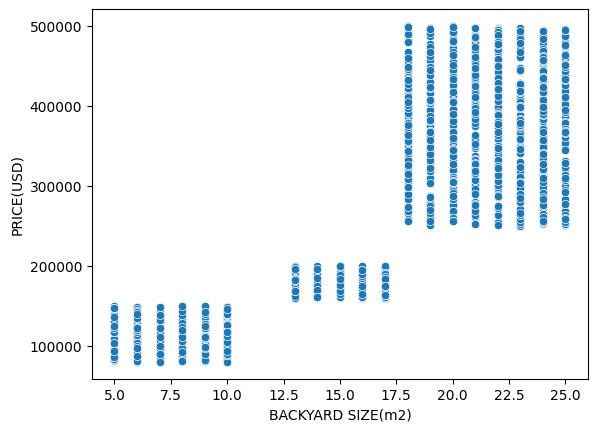

In [10]:
#Procedimiento paso a paso primer dataset (regresión lineal)

sns.scatterplot(data = data_1, x = data_1['BACKYARD SIZE(m2)'], y = data_1['PRICE(USD)'])
plt.show()

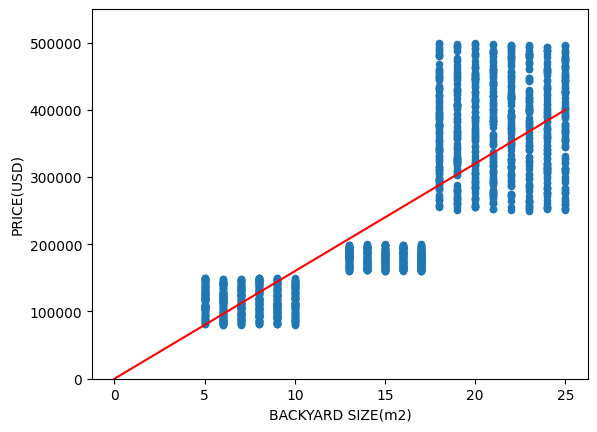

In [11]:
w = 16000
b = 0
x = np.linspace(0, data_1['BACKYARD SIZE(m2)'].max(), 100)
y = (w*x)+b

data_1.plot.scatter(x = 'BACKYARD SIZE(m2)', y = 'PRICE(USD)')
plt.plot(x, y, '-r')
plt.ylim(0, data_1['PRICE(USD)'].max()*1.1)
plt.show()

In [12]:
#Prediccion

data_1['Pred'] = data_1['BACKYARD SIZE(m2)']*w+b

#Funcion de error

data_1['Diff'] = data_1['Pred'] - data_1['PRICE(USD)']
data_1['Cuad'] = data_1['Diff']**2
data_1.head()

,BACKYARD SIZE(m2),PRICE(USD),Pred,Diff,Cuad
0,9,105389,144000,38611,1490809321
1,7,104966,112000,7034,49477156
2,5,126301,80000,-46301,2143782601
3,5,117774,80000,-37774,1426875076
4,7,132206,112000,-20206,408282436


In [13]:
w = np.linspace(1000, 28000, 50)
grid_error = pd.DataFrame(w, columns = ['w'])
grid_error.head()

,w
0,1000.000000
1,1551.020408
2,2102.040816
3,2653.061224
4,3204.081633


In [14]:
def sum_error(w, train):
  b = 0
  data_1['Pred'] = data_1['BACKYARD SIZE(m2)']*w+b
  data_1['Diff'] = data_1['Pred'] - data_1['PRICE(USD)']
  data_1['Cuad'] = data_1['Diff']**2
  data_1.head()
  return(data_1['Cuad'].mean())

grid_error['error'] = grid_error['w'].apply(lambda x: sum_error(x, train = data_1))
grid_error.head()

,w,error
0,1000.000000,6.684419e+10
1,1551.020408,6.235764e+10
2,2102.040816,5.803877e+10
3,2653.061224,5.388759e+10
4,3204.081633,4.990410e+10


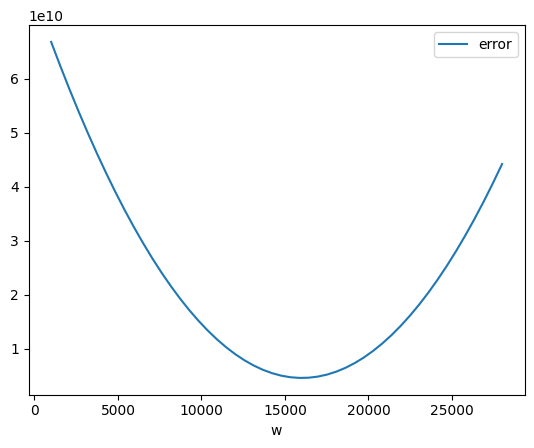

In [15]:
grid_error.plot(x = 'w', y = 'error')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


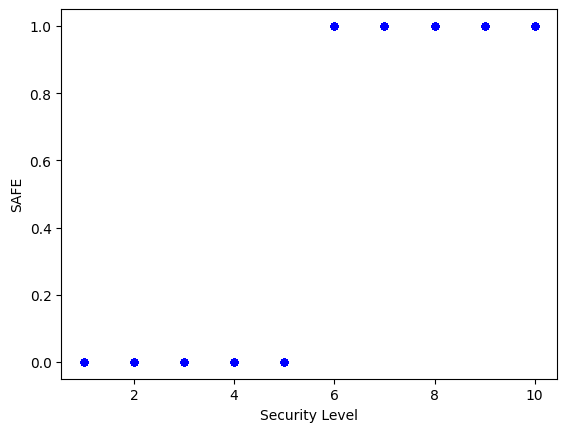

In [16]:
#Procedimiento paso a paso regresión logistica para el segundo dataset

data_2.plot.scatter(x = 'Security Level', y = 'SAFE', c = 'b')
plt.show()


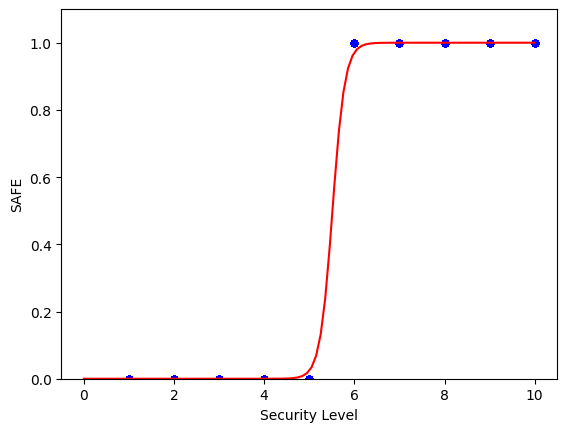

In [17]:
#Parametros al ojo
w = 7.22 
b = -39.81

x = np.linspace(0, data_2['Security Level'].max(), 100) #Inicio, final, cantidad
y = 1/(1 + np.exp(-(w*x+b)))

data_2.plot.scatter(x = 'Security Level', y = 'SAFE', c = 'b')
plt.plot(x, y, '-r')
plt.ylim(0, data_2['SAFE'].max()*1.1)
#plt.grid()
plt.show()

In [18]:
array = np.mgrid[3.22:9.22:0.1, -40.81:-30.81:5].reshape(2,-1).T
df = pd.DataFrame(data = array, columns = ['w', 'b'])
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

def sum_error_df(df):
  data_2['sigmoid'] = 1/(1 + np.exp(-(data_2['Security Level']*df['w']+df['b'])))
  data_2['loss_xi'] = -data_2['SAFE']*np.log(data_2['sigmoid'])-(1 - data_2['SAFE'])*np.log(1 - data_2['sigmoid'])
  j_cost = data_2['loss_xi'].mean()
  return(j_cost)

sum_error_df(df)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9800849741030015

In [19]:
df['error'] = df.apply(sum_error_df, axis = 1)
df.sort_values(by = ['error']).head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,w,b,error
126,7.42,-40.81,0.004740
129,7.52,-40.81,0.005371
123,7.32,-40.81,0.005515
100,6.52,-35.81,0.007425
132,7.62,-40.81,0.007438


In [20]:
df_3d = df.pivot(index = 'w', columns = 'b', values = 'error')
df_3d.head()

b,-40.81,-35.81,-30.81
w,,,
3.22,7.455868,4.951744,2.632535
3.32,7.051950,4.552774,2.341661
3.42,6.648093,4.161337,2.076320
3.52,6.244398,3.785767,1.835845
3.62,5.841142,3.435663,1.617113


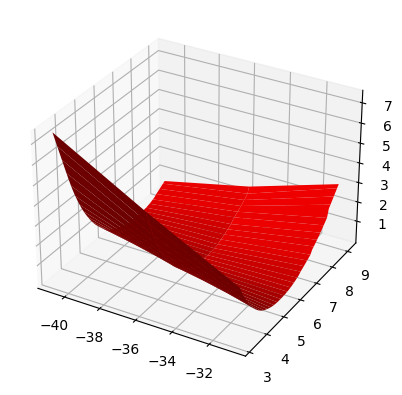

In [21]:
x = df_3d.columns
y = df_3d.index
X, Y = np.meshgrid(x, y)
Z = df_3d
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, color = 'r')
plt.show()

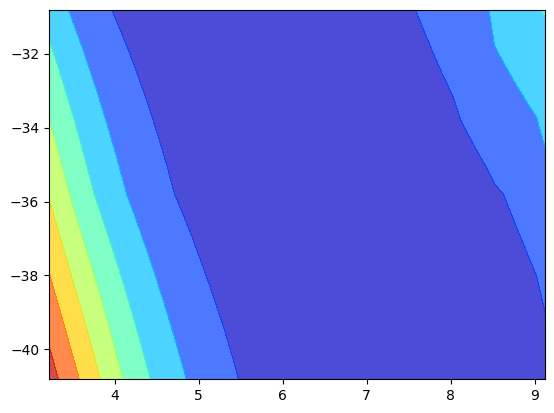

In [22]:
plt.contourf(Y, X, Z, alpha = 0.7, cmap = plt.cm.jet)
plt.show()


In [23]:
def delta_j_w(w, b):
   data_2['sigmoid'] = 1/(1 + np.exp(-(data_2['Security Level']*df['w']+df['b'])))
   data_2['partial_loss'] = (data_2['sigmoid'] - data_2['SAFE'])*data_2['Security Level']
   derivate = data_2['partial_loss'].mean()
   return(derivate)

def delta_j_b(w, b):
  data_2['sigmoid'] = 1/(1 + np.exp(-(data_2['Security Level']*w+b)))
  data_2['partial_loss'] = (data_2['sigmoid'] - data_2['SAFE'])
  derivate = data_2['partial_loss'].mean()
  return(derivate)


In [26]:
w_0 = 7.22 
b_0 = -39.81
print(delta_j_w(w_0, b_0), delta_j_b(w_0, b_0))

-0.4569846120120609 -0.00012660694589461768


In [27]:
alpha_w = 0.001
alpha_b = 0.1
w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)
w_0 = w_new
b_0 = b_new
w_0 = np.round(w_0, 5)
b_0 = np.round(b_0, 5)
print(w_0, b_0)

7.22046 -39.80999
